# GRIP : Task 2
## Problem Statement: Predicting percentage score of a student based on no. of hours of study
### In this notebook we will be training different supervised learning models and chose one which has the best validation accuracy

## Import all relevant libraries

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

## Reading data and displaying it

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

#printing first 5 rows
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Checking for any missing values

In [3]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

## Visualizing the relationship between hours and scores

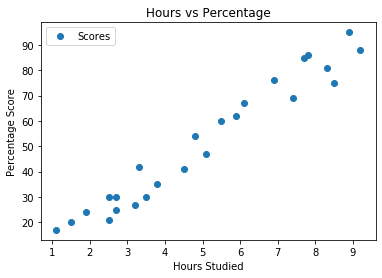

In [4]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the graph above we can see there is a positive relation between hours studied and scores

## Slicing the data set into feature X and label Y

In [5]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

print('X_arr shape: ', X.shape)
print('Y_arr shape: ', Y.shape)

X_arr shape:  (25, 1)
Y_arr shape:  (25,)


## Splitting the data set (80% training set and 20% validation set )

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state=0)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_val.shape)
print('y_test shape: ', y_val.shape)

X_train shape:  (20, 1)
y_train shape:  (20,)
X_test shape:  (5, 1)
y_test shape:  (5,)


## Training Model 1 : Linear Regression

In [7]:
linModel = LinearRegression()  
linModel.fit(X_train, y_train) 

print("Training complete.")

Training complete.


## Visualizing how well the model fits the data

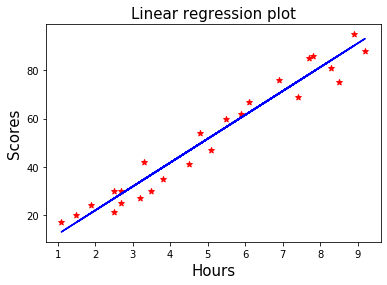

In [9]:
# Plotting the regression line
line = linModel.coef_*X +linModel.intercept_

# Plotting for the training data
plt.scatter(X, Y,color='red',marker='*')
plt.plot(X, line,color='blue')
plt.ylabel("Scores",fontsize=15)
plt.xlabel("Hours",fontsize=15)
plt.title("Linear regression plot",fontsize=15)
plt.show()


## Comparing the actual y values with model predicted values 

In [11]:
#comparing the validation set predictions with the actual values
linPrediction = linModel.predict(X_val)
df = pd.DataFrame({'Actual': y_val, 'Predicted': linPrediction})  
df 


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Evaluating model 1 

In [13]:
print('Training Accuracy:',(100*linModel.score(X_train, y_train)).round(2),'%')
print('Validation Accuracy',(100*linModel.score(X_val, y_val)).round(2),'%')
MAE1=mean_absolute_error(linPrediction,y_val)
RMSE1=np.sqrt(mean_squared_error(y_val,linPrediction))
print('Mean Absolute error in Model 1:',MAE1.round(2))
print('Root Mean Squared Error in Model 1:',RMSE1.round(2))

Training Accuracy: 95.16 %
Validation Accuracy 94.55 %
Mean Absolute error in Model 1: 4.18
Root Mean Squared Error in Model 1: 4.65


## Training Model 2 : Random Forest

In [14]:
RFmodel = RandomForestRegressor(n_estimators=10 ,random_state=0)
RFmodel.fit(X_train,y_train)
print("Training complete.")

Training complete.


## Visualizing a single descision tree

In [15]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = RFmodel.estimators_[4]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = list((df.iloc[:,:-1]).columns), rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

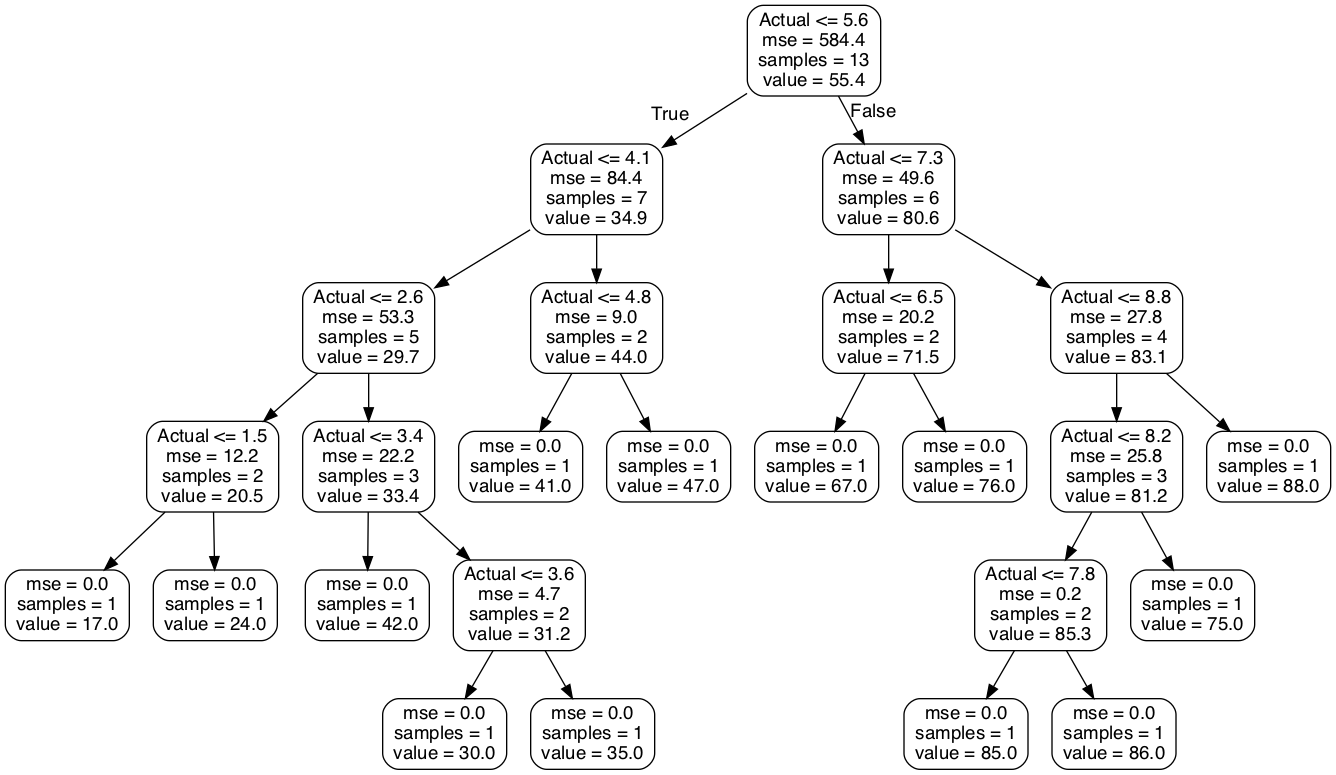

In [16]:
from IPython.display import Image
Image(filename='tree.png') 

## Comparing the actual y values with model predicted values 

In [17]:
#comparing the validation set predictions with the actual values
RF_Prediction = RFmodel.predict(X_val)
X1 = X_val.flatten()
df = pd.DataFrame({'Hours':X1,'Actual': y_val, 'Predicted': RF_Prediction})  
df 

,Hours,Actual,Predicted
0,1.5,20,19.7
1,3.2,27,38.4
2,7.4,69,84.3
3,2.5,30,23.0
4,5.9,62,66.5


## Evaluating model 2

In [18]:
print('Training Accuracy:',(100*RFmodel.score(X_train, y_train)).round(2),'%')
print('Validation Accuracy',(100*RFmodel.score(X_val, y_val)).round(2),'%')
MAE2=mean_absolute_error(RF_Prediction,y_val)
RMSE2=np.sqrt(mean_squared_error(y_val,linPrediction))
print('Mean Absolute error in Model 2:',MAE2.round(2))
print('Root Mean Squared Error in Model 2:',RMSE2.round(2))

Training Accuracy: 98.66 %
Validation Accuracy 78.12 %
Mean Absolute error in Model 2: 7.7
Root Mean Squared Error in Model 2: 4.65


## Training model 3 : Ridge Regularization model

In [19]:
# while training,larger the value of alpha,stronger the regularization
rr = Ridge(alpha=1,random_state=0 )
rr.fit(X_train, y_train)
print("Training complete.")

Training complete.


## Visualizing how well the model fits the data

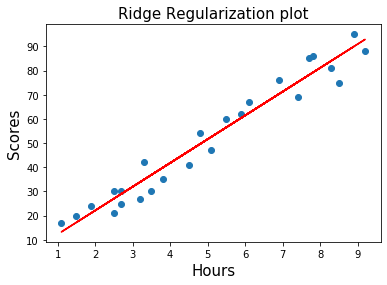

In [20]:
plt.scatter(X, Y)
plt.plot(X, rr.predict(X), c='red')
plt.ylabel("Scores",fontsize=15)
plt.xlabel("Hours",fontsize=15)
plt.title("Ridge Regularization plot",fontsize=15)
plt.show()

## Comparing the actual y values with model predicted values 

In [21]:
#comparing the validation set predictions with the actual values
rrPrediction = rr.predict(X_val)
df = pd.DataFrame({'Actual': y_val, 'Predicted': rrPrediction})  
df 

,Actual,Predicted
0,20,17.181700
1,27,33.894564
2,69,75.185168
3,30,27.012796
4,62,60.438524


## Evaluating model 3

In [23]:
print('Training Accuracy:',(100*rr.score(X_train, y_train)).round(2),'%')
print('Validation Accuracy',(100*rr.score(X_val, y_val)).round(2),'%')
MAE3=mean_absolute_error(rrPrediction,y_val)
RMSE3=np.sqrt(mean_squared_error(y_val,rrPrediction))
print('Mean Absolute error in Model 1:',MAE3.round(2))
print('Root Mean Squared Error in Model 1:',RMSE3.round(2))

Training Accuracy: 95.15 %
Validation Accuracy 94.7 %
Mean Absolute error in Model 1: 4.09
Root Mean Squared Error in Model 1: 4.58


## Training model 4 : Lasso Regression model

In [24]:
lasso = Lasso(alpha=1,random_state = 0)
#Fitting the Training data to the Lasso regressor
lasso.fit(X_train,y_train)
print("Training complete.")

Training complete.


## Visualizing how well the model fits the data

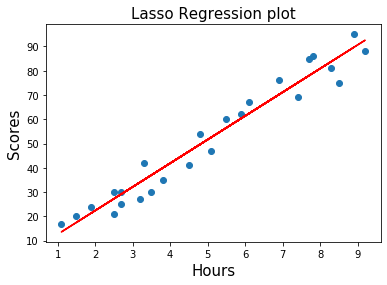

In [25]:
plt.scatter(X, Y)
plt.plot(X, lasso.predict(X), c='red')
plt.ylabel("Scores",fontsize=15)
plt.xlabel("Hours",fontsize=15)
plt.title("Lasso Regression plot",fontsize=15)
plt.show()

## Comparing the actual y values with model predicted values 

In [26]:
#comparing the validation set predictions with the actual values
lassoPrediction = lasso.predict(X_val)
df = pd.DataFrame({'Actual': y_val, 'Predicted':lassoPrediction})  
df 

,Actual,Predicted
0,20,17.489479
1,27,34.062443
2,69,75.007413
3,30,27.238282
4,62,60.384210


## Evaluating model 4

In [27]:
print('Training Accuracy:',(100*lasso.score(X_train, y_train)).round(2),'%')
print('Validation Accuracy',(100*lasso.score(X_val, y_val)).round(2),'%')
MAE4=mean_absolute_error(lassoPrediction,y_val)
RMSE4=np.sqrt(mean_squared_error(y_val,lassoPrediction))
print('Mean Absolute error in Model 1:',MAE4.round(2))
print('Root Mean Squared Error in Model 1:',RMSE4.round(2))

Training Accuracy: 95.13 %
Validation Accuracy 94.83 %
Mean Absolute error in Model 1: 3.99
Root Mean Squared Error in Model 1: 4.53


## Training model 5 : Elastic Net model

In [28]:
# Train the model 
e_net = ElasticNet(alpha = 1) 
e_net.fit(X_train, y_train) 
print("Training complete.")

Training complete.


## Visualizing how well the model fits the data

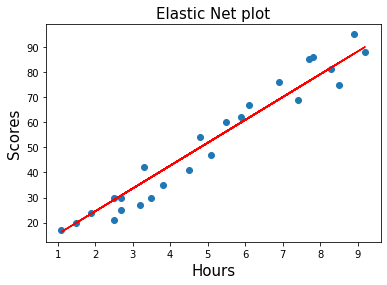

In [29]:
plt.scatter(X, Y)
plt.plot(X, e_net.predict(X), c='red')
plt.ylabel("Scores",fontsize=15)
plt.xlabel("Hours",fontsize=15)
plt.title("Elastic Net plot",fontsize=15)
plt.show()

## Comparing the actual y values with model predicted values 

In [30]:
#comparing the validation set predictions with the actual values
enetPrediction = e_net.predict(X_val)
df = pd.DataFrame({'Actual': y_val, 'Predicted':enetPrediction})  
df 

,Actual,Predicted
0,20,19.939207
1,27,35.398658
2,69,73.592597
3,30,29.033002
4,62,59.951905


## Evaluating model 5

In [31]:
print('Training Accuracy:',(100*e_net.score(X_train, y_train)).round(2),'%')
print('Validation Accuracy',(100*e_net.score(X_val, y_val)).round(2),'%')
MAE5=mean_absolute_error(enetPrediction,y_val)
RMSE5=np.sqrt(mean_squared_error(y_val,enetPrediction))
print('Mean Absolute error in Model 5:',MAE5.round(2))
print('Root Mean Squared Error in Model 5:',RMSE5.round(2))

Training Accuracy: 94.51 %
Validation Accuracy 95.12 %
Mean Absolute error in Model 5: 3.21
Root Mean Squared Error in Model 5: 4.4


## Comparing different models based on their deviation from actual values 

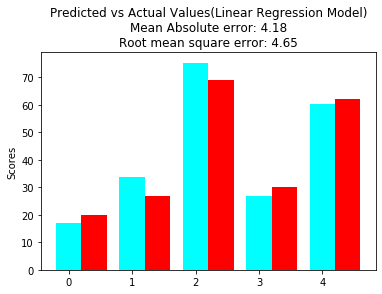

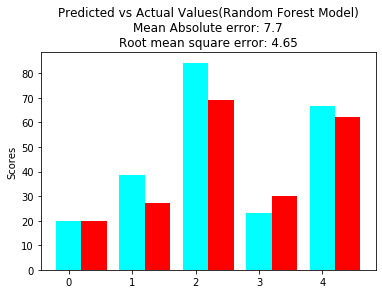

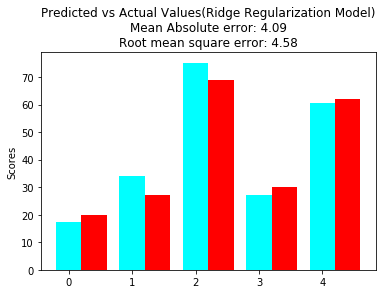

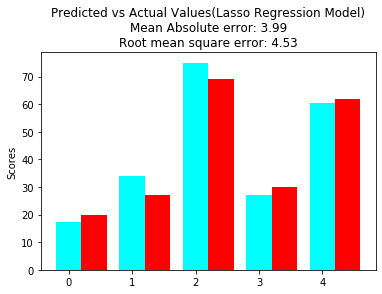

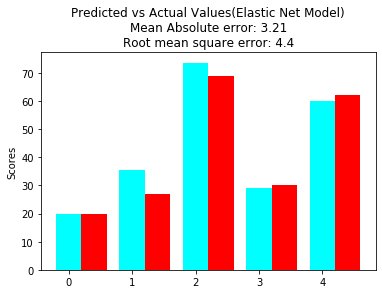

In [33]:

N=np.arange(5)
plt.bar(N+0.4,y_val,width=0.4,label='Actual',color='red')
plt.bar(N,linPrediction,width=0.4,label='Linear Regression',color='cyan')
plt.ylabel('Scores')
plt.title('Predicted vs Actual Values(Linear Regression Model)\nMean Absolute error: {}\nRoot mean square error: {}'.format(MAE1.round(2),RMSE1.round(2)))
plt.show()
plt.bar(N+0.4,y_val,width=0.4,label='Actual',color='red')
plt.bar(N,RF_Prediction,width=0.4,label='Random Forest',color='cyan')
plt.ylabel('Scores')
plt.title('Predicted vs Actual Values(Random Forest Model)\nMean Absolute error: {}\nRoot mean square error: {}'.format(MAE2.round(2),RMSE2.round(2)))
plt.show()

plt.bar(N+0.4,y_val,width=0.4,label='Actual',color='red')
plt.bar(N,rrPrediction,width=0.4,label='Ridge Regularization',color='cyan')
plt.ylabel('Scores')
plt.title('Predicted vs Actual Values(Ridge Regularization Model)\nMean Absolute error: {}\nRoot mean square error: {}'.format(MAE3.round(2),RMSE3.round(2)))
plt.show()

plt.bar(N+0.4,y_val,width=0.4,label='Actual',color='red')
plt.bar(N,lassoPrediction,width=0.4,label='Lasso Regression',color='cyan')
plt.ylabel('Scores')
plt.title('Predicted vs Actual Values(Lasso Regression Model)\nMean Absolute error: {}\nRoot mean square error: {}'.format(MAE4.round(2),RMSE4.round(2)))
plt.show()

plt.bar(N+0.4,y_val,width=0.4,label='Actual',color='red')
plt.bar(N,enetPrediction,width=0.4,label='Elastic Net',color='cyan')
plt.ylabel('Scores')
plt.title('Predicted vs Actual Values(Elastic Net Model)\nMean Absolute error: {}\nRoot mean square error: {}'.format(MAE5.round(2),RMSE5.round(2)))
plt.show()



#### Here we can see that model 5(elastic net) has the least error so we can choose this model for testing 

## Testing elastic net model
### What will be predicted score if a student studies for 9.25 hrs in a day?

In [34]:
#Testing with hours = 9.25
hours = 9.25
own_pred = e_net.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0].round(2)))

No of Hours = 9.25
Predicted Score = 90.42
